<a href="https://colab.research.google.com/github/soumya-1313/parameter-optimization/blob/main/Parameter_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install pandas numpy scikit-learn matplotlib seaborn optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 18.7 MB/s eta 0:00:00


In [1]:
from google.colab import files
uploaded = files.upload()


Saving Sensorless_drive_diagnosis.txt to Sensorless_drive_diagnosis.txt


In [2]:
import pandas as pd

# Assuming you uploaded 'Sensorless_drive_diagnosis.txt'
data = pd.read_csv("Sensorless_drive_diagnosis.txt", delim_whitespace=True, header=None)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

print("✅ Data loaded from uploaded file.")
print("Shape:", X.shape, "| Classes:", y.nunique())


<ipython-input-2-ed4d0cba378f>:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv("Sensorless_drive_diagnosis.txt", delim_whitespace=True, header=None)


✅ Data loaded from uploaded file.
Shape: (58509, 48) | Classes: 11


In [9]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✅ Data loaded and scaled.")
print("Features shape:", X.shape)
print("Number of classes:", y.nunique())

results = []
all_convergence = []

✅ Data loaded and scaled.
Features shape: (58509, 48)
Number of classes: 11


Params: {'kernel': 'linear', 'nu': 0.1, 'gamma': 'scale'} -> Accuracy: 0.8072
Params: {'kernel': 'rbf', 'nu': 0.1, 'gamma': 'scale'} -> Accuracy: 0.9834
Params: {'kernel': 'rbf', 'nu': 0.3, 'gamma': 'scale'} -> Accuracy: 0.9662
Params: {'kernel': 'poly', 'nu': 0.2, 'gamma': 'scale'} -> Accuracy: 0.9573
Params: {'kernel': 'sigmoid', 'nu': 0.2, 'gamma': 'scale'} -> Accuracy: 0.4142

🏆 Best Parameters:
{'kernel': 'rbf', 'nu': 0.1, 'gamma': 'scale'}
✅ Accuracy: 98.34%


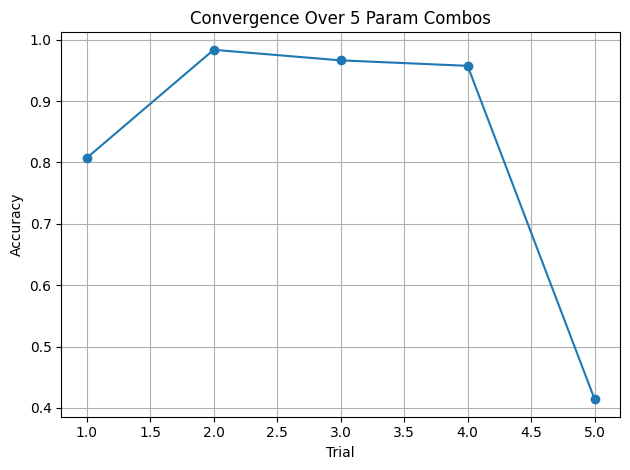

In [14]:
import pandas as pd
import numpy as np
from sklearn.svm import NuSVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
X_scaled = StandardScaler().fit_transform(X)

# Train/test split once
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Define 5 hand-picked param combos
param_list = [
    {"kernel": "linear", "nu": 0.1, "gamma": "scale"},
    {"kernel": "rbf", "nu": 0.1, "gamma": "scale"},
    {"kernel": "rbf", "nu": 0.3, "gamma": "scale"},
    {"kernel": "poly", "nu": 0.2, "gamma": "scale"},
    {"kernel": "sigmoid", "nu": 0.2, "gamma": "scale"}
]

accuracies = []
for params in param_list:
    model = NuSVC(**params)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    accuracies.append(acc)
    print(f"Params: {params} -> Accuracy: {acc:.4f}")

# Best result
best_idx = np.argmax(accuracies)
best_params = param_list[best_idx]
best_acc = accuracies[best_idx]

print("\n🏆 Best Parameters:")
print(best_params)
print(f"✅ Accuracy: {best_acc:.2%}")

# Convergence plot
plt.plot(range(1, 6), accuracies, marker='o')
plt.title("Convergence Over 5 Param Combos")
plt.xlabel("Trial")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.savefig("superfast_convergence_graph.png")
plt.show()
